In [78]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from  sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from  sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import model_selection
import plotly.express as px
import rfpimp
import pickle

In [79]:
df = pd.read_csv("../data/clean/clean_encoded.csv")

In [80]:
df.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,231,0,11,93.994,364,4.857,51910,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,231,0,11,93.994,364,4.857,51910,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,231,0,11,93.994,364,4.857,51910,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,231,0,11,93.994,364,4.857,51910,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,231,0,11,93.994,364,4.857,51910,0,...,0,0,0,1,0,0,0,0,1,0


In [81]:
X = df.drop("y", axis=1)
y = df.y

In [82]:
rfc = RandomForestClassifier()
score = cross_validate(rfc, X, y, cv=5, scoring=('accuracy', 'average_precision', 'recall','f1',"roc_auc", "neg_log_loss"), n_jobs=-1)

In [83]:
score

{'fit_time': array([2.90624475, 3.20151329, 3.26684213, 3.29464316, 3.31703997]),
 'score_time': array([0.23522925, 0.25758791, 0.28787184, 0.20253181, 0.15688396]),
 'test_accuracy': array([0.88732394, 0.3513054 , 0.47079539, 0.13649059, 0.14414086]),
 'test_average_precision': array([0.09148352, 0.08146403, 0.08774248, 0.06918674, 0.07573022]),
 'test_recall': array([0.        , 0.00431499, 0.01077586, 0.        , 1.        ]),
 'test_f1': array([0.        , 0.00149533, 0.0045683 , 0.        , 0.20844564]),
 'test_roc_auc': array([0.13486129, 0.02240581, 0.03163852, 0.02326462, 0.26879663]),
 'test_neg_log_loss': array([ -2.95648958, -15.00802859,  -3.84021426, -17.35440517,
        -10.53830707])}

In [84]:
score["test_accuracy"].mean()

0.3980112368198261

In [85]:
bgc = BaggingClassifier()
score = cross_validate(bgc, X, y, cv=5, scoring=('accuracy', 'average_precision', 'recall','f1',"roc_auc", "neg_log_loss"), n_jobs=-1)

In [86]:
score

{'fit_time': array([1.342592  , 1.4279139 , 1.541188  , 1.73444295, 1.620754  ]),
 'score_time': array([0.05914807, 0.05797315, 0.07025599, 0.0478189 , 0.05760217]),
 'test_accuracy': array([0.88732394, 0.23217972, 0.25379478, 0.123983  , 0.14219794]),
 'test_average_precision': array([0.11650073, 0.10345994, 0.10400751, 0.10926005, 0.11637823]),
 'test_recall': array([0.        , 0.01186624, 0.01293103, 0.00323276, 1.        ]),
 'test_f1': array([0.        , 0.0034673 , 0.00389042, 0.00083102, 0.20807175]),
 'test_roc_auc': array([0.50215517, 0.03222038, 0.03975065, 0.02714427, 0.51785959]),
 'test_neg_log_loss': array([ -3.87595272, -21.76940293, -16.13461007, -29.64102778,
        -29.560448  ])}

In [87]:
score["test_accuracy"].mean()

0.32789587555692384

In [88]:
dtc = DecisionTreeClassifier()
score = cross_validate(dtc, X, y, cv=5, scoring=('accuracy', 'average_precision', 'recall','f1',"roc_auc", "neg_log_loss"), n_jobs=-1)

In [89]:
score

{'fit_time': array([0.21811295, 0.2419982 , 0.24934006, 0.27375317, 0.23965883]),
 'score_time': array([0.02523112, 0.02320194, 0.02201104, 0.01644802, 0.02247214]),
 'test_accuracy': array([0.88744536, 0.13940498, 0.20461445, 0.11754706, 0.13721919]),
 'test_average_precision': array([0.11363222, 0.11090241, 0.1099932 , 0.11196725, 0.11552347]),
 'test_recall': array([0.00107759, 0.01510248, 0.0237069 , 0.00646552, 1.        ]),
 'test_f1': array([0.00215285, 0.00393535, 0.00667273, 0.00164858, 0.20711974]),
 'test_roc_auc': array([0.50053879, 0.08500268, 0.12523662, 0.06851617, 0.51382236]),
 'test_neg_log_loss': array([ -3.88749948, -29.72466683, -27.46875505, -30.48013439,
        -29.80008348])}

In [90]:
score["test_accuracy"].mean()

0.2972462065485895

In [96]:
knc = KNeighborsClassifier()
score = cross_validate(knc, X, y, cv=5, scoring=('accuracy', 'average_precision', 'recall','f1',"roc_auc", "neg_log_loss"), n_jobs=-1)

In [97]:
score

{'fit_time': array([0.65540195, 0.46937799, 0.43440104, 0.62056589, 0.9013052 ]),
 'score_time': array([1.22512317, 1.64025879, 1.95650315, 1.74488616, 1.52446198]),
 'test_accuracy': array([0.88732394, 0.37802064, 0.79137826, 0.20510018, 0.39198543]),
 'test_average_precision': array([0.12128157, 0.10438863, 0.10560767, 0.09729039, 0.22661783]),
 'test_recall': array([0.        , 0.00107875, 0.00646552, 0.03771552, 1.        ]),
 'test_f1': array([0.        , 0.00039032, 0.00693642, 0.01058041, 0.27043567]),
 'test_roc_auc': array([0.50484914, 0.12418614, 0.19431075, 0.08422633, 0.78329   ]),
 'test_neg_log_loss': array([ -3.85570914, -20.7713459 ,  -4.07092558, -26.885071  ,
        -13.64281178])}

In [98]:
score["test_accuracy"].mean()

0.5307616921932323

KNeighboraClassifier seems to deliver the best results in terms of accuracy. So I try to optimize this classifier a bit.

In [115]:
k_range = range(100, 2000, 100)
k_scores = []
for k in k_range:
    knc = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knc, X, y, cv=5, scoring="accuracy", n_jobs=-1)
    k_scores.append(score.mean())
print(k_scores)

[0.5814477881252299, 0.6153275695459948, 0.673542505793718, 0.7047750498131473, 0.8198691603170938, 0.8397112975362802, 0.8403427486595346, 0.8412656387627525, 0.8398813036079256, 0.8408284802928072, 0.8426256873359159, 0.8429899860608703, 0.8429899860608703, 0.8429899860608703, 0.8429899860608703, 0.8429899860608703, 0.8429899860608703, 0.8430628458058612, 0.8430871323875249]


Text(0, 0.5, 'Cross-Validated Accuracy')

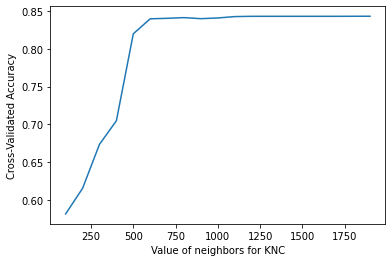

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel("Value of neighbors for KNC")
plt.ylabel("Cross-Validated Accuracy")

As seen in the plot. A KNC with 700 neighbors would be a good choice. Higher numbers of neighbors won't lead to much improvement anymore.

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
knc = KNeighborsClassifier(n_neighbors=700)
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=700, p=2,
                     weights='uniform')

In [119]:
y_pred = knc.predict(X_test)

In [120]:
accuracy_score(y_test, y_pred)

0.8935162700339971

In [121]:
roc_auc_score(y_test, y_pred)

0.5689247644881182

In [122]:
pickle.dump(knc, open('../models/KNeighborsClassifier.model', 'wb'))

In [ ]:
importance = rfpimp.importances(knc, X_train, y_train)
rfpimp.plot_importances(importance)

In [11]:
loaded_rfc = pickle.load(open('../models/RandomForestClassifier.model', 'rb'))

In [ ]:
sample = ["..."]

In [ ]:
loaded_rfc.predict([sample])